In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [25]:
data=pd.read_csv("C:\\Users\\anupa\\OneDrive - vit.ac.in\\Notebooks\\PROJECTS\\SET\\SURVEY ON INDIAN EDUCATION SYSTEM.csv")

In [26]:
df=pd.DataFrame(data)
df.columns

Index(['Timestamp', 'Age', 'Gender',
       'Education Qualification(mention the specialization)',
       'Year of completion',
       'Are you happy with the program what you studied/studying? ',
       'What made you choose this course(program)?',
       'Is your chosen course/program your first preference? If not, what was it?',
       'What are the factors or circumstances that influenced you to change your preference? ',
       'What are your short-term future career plans? ',
       'In the current competitive scenario, how stressful do you feel on a scale of 10',
       'How do you manage your stress?',
       'Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.',
       'Provide your views on university entrance examinations',
       'Rank based on preference the following teaching methods on a scale of 1-5 (1-Most preferable,5-least)\nFor example: If flipped classroom is given 1 then the other methods cannot have the preferenc

In [4]:
# Create new pandas DataFrame.
df2 = df[['Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.']]
df2.head()

,Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.
0,"The descriptive method of examinations, is tru..."
1,Sometimes yes sometimes no. When there is back...
2,No. The impetus on memory and outdated applica...
3,"It most definitely is not appropriate, I assum..."
4,No not at all. It's all other than what is req...


In [5]:
# Step 1: Cleaning the text
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2['Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.'].apply(clean)
print(df2['Cleaned Reviews'])

0      The descriptive method of examinations is trul...
1      Sometimes yes sometimes no When there is back ...
2      No The impetus on memory and outdated applicat...
3      It most definitely is not appropriate I assume...
4      No not at all It s all other than what is requ...
                             ...                        
141                                                   No
142            Yes judgement of students by their scores
143                                                  Yes
144                                                  Yes
145    Not accurately More focus should be on industr...
Name: Cleaned Reviews, Length: 146, dtype: object


<ipython-input-5-505a76772690>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cleaned Reviews'] = df2['Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.'].apply(clean)


In [6]:
# Step 2: Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
get_ipython().system('pip install -U textblob')

In [8]:
# POS tagger dictionary

from textblob import TextBlob

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

In [9]:
df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)
print(df2['POS tagged'])

def token_stop_pos(list1):
    tags=pos_tag(list1)
    newlist = []
    for word, tag in tags :
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)
print(df2['POS stopword'])

<ipython-input-9-43a10399ae26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)


0      [The, descriptive, method, of, examination, be...
1      [Sometimes, yes, sometimes, no, When, there, b...
2      [No, The, impetus, on, memory, and, outdated, ...
3      [It, most, definitely, be, not, appropriate, I...
4      [No, not, at, all, It, s, all, other, than, wh...
                             ...                        
141                                                 [No]
142      [Yes, judgement, of, student, by, their, score]
143                                                [Yes]
144                                                [Yes]
145    [Not, accurately, More, focus, should, be, on,...
Name: POS tagged, Length: 146, dtype: object
0      [(descriptive, a), (method, n), (examination, ...
1      [(Sometimes, r), (yes, r), (sometimes, r), (ba...
2      [(impetus, n), (memory, n), (outdated, a), (ap...
3      [(definitely, r), (appropriate, a), (assume, v...
4                                         [(require, n)]
                             ...           

<ipython-input-9-43a10399ae26>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)


In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS stopword'].apply(lemmatize)
df2.head()

<ipython-input-10-5fc106740a5a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lemma'] = df2['POS stopword'].apply(lemmatize)


,Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.,Cleaned Reviews,POS tagged,POS stopword,Lemma
0,"The descriptive method of examinations, is tru...",The descriptive method of examinations is trul...,"[The, descriptive, method, of, examination, be...","[(descriptive, a), (method, n), (examination, ...",descriptive method examination truly right w...
1,Sometimes yes sometimes no. When there is back...,Sometimes yes sometimes no When there is back ...,"[Sometimes, yes, sometimes, no, When, there, b...","[(Sometimes, r), (yes, r), (sometimes, r), (ba...",Sometimes yes sometimes back back exam Stres...
2,No. The impetus on memory and outdated applica...,No The impetus on memory and outdated applicat...,"[No, The, impetus, on, memory, and, outdated, ...","[(impetus, n), (memory, n), (outdated, a), (ap...",impetus memory outdated application base tes...
3,"It most definitely is not appropriate, I assum...",It most definitely is not appropriate I assume...,"[It, most, definitely, be, not, appropriate, I...","[(definitely, r), (appropriate, a), (assume, v...",definitely appropriate assume well examinati...
4,No not at all. It's all other than what is req...,No not at all It s all other than what is requ...,"[No, not, at, all, It, s, all, other, than, wh...","[(require, n)]",require


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-11-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-11-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-11-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"The descriptive method of examinations, is tru...",The descriptive method of examinations is trul...,"[The, descriptive, method, of, examination, be...","[(descriptive, a), (method, n), (examination, ...",descriptive method examination truly right w...,0.360119,0.214286,Positive
1,Sometimes yes sometimes no. When there is back...,Sometimes yes sometimes no When there is back ...,"[Sometimes, yes, sometimes, no, When, there, b...","[(Sometimes, r), (yes, r), (sometimes, r), (ba...",Sometimes yes sometimes back back exam Stres...,0.000000,0.000000,Neutral
2,No. The impetus on memory and outdated applica...,No The impetus on memory and outdated applicat...,"[No, The, impetus, on, memory, and, outdated, ...","[(impetus, n), (memory, n), (outdated, a), (ap...",impetus memory outdated application base tes...,0.877778,-0.700000,Negative
3,"It most definitely is not appropriate, I assum...",It most definitely is not appropriate I assume...,"[It, most, definitely, be, not, appropriate, I...","[(definitely, r), (appropriate, a), (assume, v...",definitely appropriate assume well examinati...,0.650000,0.475000,Positive
4,No not at all. It's all other than what is req...,No not at all It s all other than what is requ...,"[No, not, at, all, It, s, all, other, than, wh...","[(require, n)]",require,0.000000,0.000000,Neutral


In [12]:
df5=df2[['TextBlob_Polarity','TextBlob_Analysis']]
file_name="Examination_senti.xlsx"
df5.to_excel(file_name)

In [13]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-13-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-13-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-13-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"The descriptive method of examinations, is tru...",The descriptive method of examinations is trul...,"[The, descriptive, method, of, examination, be...","[(descriptive, a), (method, n), (examination, ...",descriptive method examination truly right w...,0.360119,0.214286,Positive
1,Sometimes yes sometimes no. When there is back...,Sometimes yes sometimes no When there is back ...,"[Sometimes, yes, sometimes, no, When, there, b...","[(Sometimes, r), (yes, r), (sometimes, r), (ba...",Sometimes yes sometimes back back exam Stres...,0.000000,0.000000,Neutral
2,No. The impetus on memory and outdated applica...,No The impetus on memory and outdated applicat...,"[No, The, impetus, on, memory, and, outdated, ...","[(impetus, n), (memory, n), (outdated, a), (ap...",impetus memory outdated application base tes...,0.877778,-0.700000,Negative
3,"It most definitely is not appropriate, I assum...",It most definitely is not appropriate I assume...,"[It, most, definitely, be, not, appropriate, I...","[(definitely, r), (appropriate, a), (assume, v...",definitely appropriate assume well examinati...,0.650000,0.475000,Positive
4,No not at all. It's all other than what is req...,No not at all It s all other than what is requ...,"[No, not, at, all, It, s, all, other, than, wh...","[(require, n)]",require,0.000000,0.000000,Neutral


In [14]:
tb_counts=df2['TextBlob_Analysis'].value_counts()
print(tb_counts)

Neutral     87
Positive    41
Negative    18
Name: TextBlob_Analysis, dtype: int64


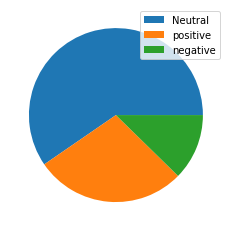

In [15]:
plt.pie(tb_counts)
plt.legend(['Neutral','positive','negative'])
plt.show()

In [16]:
df3=df2.copy()
print(df3.head())

  Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.  \
0  The descriptive method of examinations, is tru...                                                       
1  Sometimes yes sometimes no. When there is back...                                                       
2  No. The impetus on memory and outdated applica...                                                       
3  It most definitely is not appropriate, I assum...                                                       
4  No not at all. It's all other than what is req...                                                       

                                     Cleaned Reviews  \
0  The descriptive method of examinations is trul...   
1  Sometimes yes sometimes no When there is back ...   
2  No The impetus on memory and outdated applicat...   
3  It most definitely is not appropriate I assume...   
4  No not at all It s all other than what is requ...   

              

In [17]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df3['Vader Sentiment'] = df3['Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df3['Vader Analysis'] = df3['Vader Sentiment'].apply(vader_analysis)
df3.head()

,Is the present examination pattern assessing the student’s knowledge appropriate? Share your thoughts.,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Vader Sentiment,Vader Analysis
0,"The descriptive method of examinations, is tru...",The descriptive method of examinations is trul...,"[The, descriptive, method, of, examination, be...","[(descriptive, a), (method, n), (examination, ...",descriptive method examination truly right w...,0.360119,0.214286,Positive,0.8201,Positive
1,Sometimes yes sometimes no. When there is back...,Sometimes yes sometimes no When there is back ...,"[Sometimes, yes, sometimes, no, When, there, b...","[(Sometimes, r), (yes, r), (sometimes, r), (ba...",Sometimes yes sometimes back back exam Stres...,0.000000,0.000000,Neutral,-0.1145,Neutral
2,No. The impetus on memory and outdated applica...,No The impetus on memory and outdated applicat...,"[No, The, impetus, on, memory, and, outdated, ...","[(impetus, n), (memory, n), (outdated, a), (ap...",impetus memory outdated application base tes...,0.877778,-0.700000,Negative,0.2500,Neutral
3,"It most definitely is not appropriate, I assum...",It most definitely is not appropriate I assume...,"[It, most, definitely, be, not, appropriate, I...","[(definitely, r), (appropriate, a), (assume, v...",definitely appropriate assume well examinati...,0.650000,0.475000,Positive,0.9152,Positive
4,No not at all. It's all other than what is req...,No not at all It s all other than what is requ...,"[No, not, at, all, It, s, all, other, than, wh...","[(require, n)]",require,0.000000,0.000000,Neutral,-0.2960,Neutral


In [19]:
vader_counts = df3['Vader Analysis'].value_counts()
vader_counts

Neutral     123
Positive     19
Negative      4
Name: Vader Analysis, dtype: int64

In [20]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [21]:
df3['SWN analysis'] = df3['POS stopword'].apply(sentiwordnetanalysis)

0.125 0.125 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.75 0.0 0.25
0.625 0.0 0.375
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.25 0.5
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.5 0.5 0.0
0.125 0.25 0.625
0.625 0.0 0.375
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.25 0.625
0.0 0.0 1.0
0.0 0.0 1.0
0.375 0.125 0.5
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.75 0.0 0.25
0.0 0.0 1.0
0.125 0.375 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.625 0.0 0.375
0.125 0.0 0.875
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.375 0.0 0.625
0.125 0.25 0.625
0.0 1.0 0.0
0.0 0.0 1.0
0.125 0.0 0.875
0.125 0.0 0.875
0.0 0.0 1.0
0.625 0.0 0.375
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.5 0.0 0.5
0.0 0.125 0.875
0.125 0.0 0.875
0.125 0.25 0.625
0.0 0.0 1.0
0.625 0.0 0.375
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.625

In [22]:
swn_counts= df3['SWN analysis'].value_counts()
swn_counts

Neutral     61
Positive    33
Negative     9
Name: SWN analysis, dtype: int64

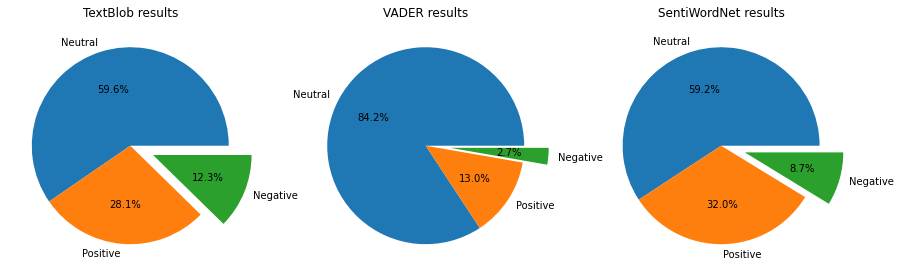

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0,0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()